In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
# data loading and handling missing values

In [3]:
car_df = pd.read_csv("Question 2 Dataset.csv")
car_df.head(10)

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6,225,18,24,3880,115,197
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,46100,3.5,6,225,18,24,3893,115,197
6,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,89765,3.2,6,290,17,24,3153,100,174
7,Audi,A4 1.8T 4dr,Sedan,Europe,Front,25940,1.8,4,170,22,31,3252,104,179
8,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,35940,1.8,4,170,23,30,3638,105,180
9,Audi,A4 3.0 4dr,Sedan,Europe,Front,31840,3.0,6,220,20,28,3462,104,179


In [4]:
# [1]
car_df.dropna(how='any', inplace=True)

In [5]:
car_df.describe().round(2)

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.00,428.00,428.00,428.00,428.00,428.00,428.00,428.00,428.00
mean,32774.86,3.20,5.80,215.89,20.06,26.84,3577.95,108.15,186.36
std,19431.72,1.11,1.56,71.84,5.24,5.74,758.98,8.31,14.36
min,10280.00,1.30,3.00,73.00,10.00,12.00,1850.00,89.00,143.00
25%,20334.25,2.38,4.00,165.00,17.00,24.00,3104.00,103.00,178.00
50%,27635.00,3.00,6.00,210.00,19.00,26.00,3474.50,107.00,187.00
75%,39205.00,3.90,6.00,255.00,21.25,29.00,3977.75,112.00,194.00
max,192465.00,8.30,12.00,500.00,60.00,66.00,7190.00,144.00,238.00


In [6]:
# Encoding Categorical Variables

In [7]:
# [2]
car_categorial_df = car_df.select_dtypes(exclude=['int64', 'float64']) #select only columns containing textual data
car_categorial_df

,Make,Model,Type,Origin,DriveTrain
0,Acura,MDX,SUV,Asia,All
1,Acura,RSX Type S 2dr,Sedan,Asia,Front
2,Acura,TSX 4dr,Sedan,Asia,Front
3,Acura,TL 4dr,Sedan,Asia,Front
4,Acura,3.5 RL 4dr,Sedan,Asia,Front
...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front
425,Volvo,S80 T6 4dr,Sedan,Europe,Front
426,Volvo,V40,Wagon,Europe,Front


In [8]:
# [3]
car_df[['DriveTrain','MSRP']].groupby('DriveTrain').describe().sort_values(by=('MSRP', 'mean'), ascending=False)

MSRP                                                          \
            count          mean           std      min       25%      50%   
DriveTrain                                                                  
Rear        110.0  46093.627273  27306.182956  12800.0  28899.25  38995.0   
All          92.0  36483.489130  14448.771061  16497.0  26295.00  33510.0   
Front       226.0  24782.557522  10697.044066  10280.0  17531.25  22582.5   

                                
                 75%       max  
DriveTrain                      
Rear        54446.25  192465.0  
All         41303.75   86970.0  
Front       28797.50   84600.0

In [9]:
# [4]
car_df[['Type', 'MSRP']].groupby('Type').describe().sort_values(by=('MSRP',  'mean'), ascending=False)

MSRP                                                          \
        count          mean           std      min       25%      50%   
Type                                                                    
Sports   49.0  53387.061224  33779.633235  18345.0  29380.00  40590.0   
SUV      60.0  34790.250000  13598.630413  17163.0  23403.00  32062.5   
Sedan   262.0  29773.618321  15584.591701  10280.0  19318.75  26432.5   
Wagon    30.0  28840.533333  11834.002794  11905.0  19615.00  25545.0   
Truck    24.0  24941.375000   9871.969328  12800.0  18477.50  22180.0   
Hybrid    3.0  19920.000000    725.465368  19110.0  19625.00  20140.0   

                           
            75%       max  
Type                       
Sports  76200.0  192465.0  
SUV     41790.0   76870.0  
Sedan   35935.0  128420.0  
Wagon   35082.5   60670.0  
Truck   27318.0   52975.0  
Hybrid  20325.0   20510.0

In [10]:
# [5]
car_df[['Origin', 'MSRP']].groupby('Origin').describe().sort_values(by=('MSRP',  'mean'), ascending=False)

MSRP                                                                  \
        count          mean           std      min      25%      50%      75%   
Origin                                                                          
Europe  123.0  48349.796748  25318.600464  16999.0  33837.5  40590.0  56382.5   
USA     147.0  28377.442177  11711.982506  10995.0  20315.0  25520.0  33767.5   
Asia    158.0  24741.322785  11321.069675  10280.0  17208.0  23032.5  28787.5   

                  
             max  
Origin            
Europe  192465.0  
USA      81795.0  
Asia     89765.0

In [11]:
# Feature Exploration

In [12]:
# [6]
car_df['Model'].value_counts()

Model
G35 4dr                                    2
C320 4dr                                   2
C240 4dr                                   2
MDX                                        1
Marauder 4dr                               1
                                          ..
Ranger 2.3 XL Regular Cab                  1
F-150 Supercab Lariat                      1
F-150 Regular Cab XL                       1
Thunderbird Deluxe convert w/hardtop 2d    1
XC70                                       1
Name: count, Length: 425, dtype: int64

In [13]:
car_df['Origin'].value_counts()

Origin
Asia      158
USA       147
Europe    123
Name: count, dtype: int64

In [14]:
# [7]
car_df['Type'].value_counts()

Type
Sedan     262
SUV        60
Sports     49
Wagon      30
Truck      24
Hybrid      3
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale_dataset(df, scaler, col=None):
    col = col if col is not None else df.columns
    numeric_df = df[col].select_dtypes(include=['int64', 'float64'])
    scaled_numeric_df = scaler.fit_transform(numeric_df)
    df[scaled_numeric_df.columns] = scaled_numeric_df
    return df

def standardize_dataset(df, col=None):
    st_scaler = StandardScaler().set_output(transform="pandas")
    return scale_dataset(df, st_scaler, col)

def normalize_dataset(df, col=None):
    mm_scaler = MinMaxScaler().set_output(transform="pandas")
    return scale_dataset(df, mm_scaler, col)

In [16]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

def apply_ordinal(df, col, ranking):
    if col in df.columns:
        df[col] = df[col].map(ranking)
    return df

def one_hot_encoding(df, col=None):
    col = col if col is not None else df.columns
    categorial_df = df[col].select_dtypes(exclude=['int64', 'float64'])
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform="pandas")
    encoded_categorial_df = ohe.fit_transform(categorial_df)
    return pd.concat([df.drop(columns=categorial_df.columns, axis=1), encoded_categorial_df], axis=1)

In [17]:
col_to_ranking = {} # rank each ordinal variable by its mean MSRP
for col in ('DriveTrain', 'Type', 'Origin', 'Make'):
    col_to_ranking[col] = car_df[[col, 'MSRP']].groupby(col).mean().rank()['MSRP'].apply(int).to_dict()

In [18]:
full_df_corr = (
    car_df.copy()
    .pipe(apply_ordinal, col='DriveTrain', ranking=col_to_ranking['DriveTrain'])
    .pipe(apply_ordinal, col='Type', ranking=col_to_ranking['Type'])
    .pipe(apply_ordinal, col='Origin', ranking=col_to_ranking['Origin'])
    .pipe(apply_ordinal, col='Make', ranking=col_to_ranking['Make'])
    .drop('Model', axis=1)
)

<Axes: >

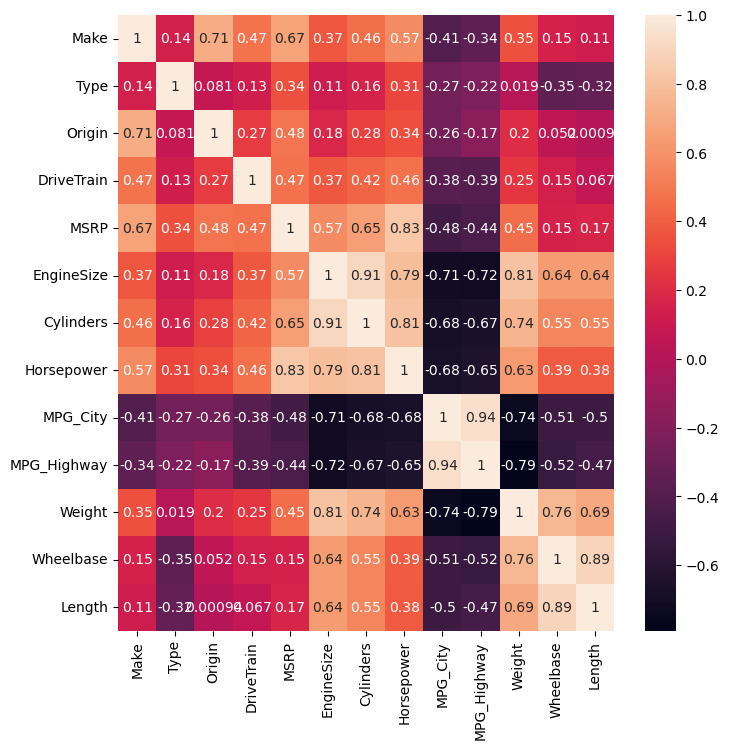

In [19]:
# [8]
plt.figure(figsize=(8,8)) 
sns.heatmap(full_df_corr.corr(), annot=True)

In [ ]:
# Selection of the regression model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [21]:
# [x]
full_df = (
    full_df_corr.copy()
    .pipe(standardize_dataset, col=[x for x in full_df_corr.columns if x != 'MSRP'])
    .pipe(normalize_dataset, col=['MSRP'])
)

In [22]:
# [9]
clean_df = full_df.drop(['MPG_Highway', 'Length', 'Wheelbase', 'EngineSize', 'Type'], axis=1)

In [23]:
mh_df = full_df[['Make', 'Horsepower', 'MSRP']]

In [24]:
# [10]
avg_dict = {
    'avg_full': {'lr': 0, 'rfr': 0, 'dtr': 0},
    'seed_full': {'lr': 0, 'rfr': 0, 'dtr': 0},
    'best_score_full': {'lr': 0, 'rfr': 0, 'dtr': 0},
    'avg_clean': {'lr': 0, 'rfr': 0, 'dtr': 0},
    'seed_clean': {'lr': 0, 'rfr': 0, 'dtr': 0},
    'best_score_clean': {'lr': 0, 'rfr': 0, 'dtr': 0},
    'avg_hm': {'lr': 0, 'rfr': 0, 'dtr': 0},
    'seed_hm': {'lr': 0, 'rfr': 0, 'dtr': 0},
    'best_score_hm': {'lr': 0, 'rfr': 0, 'dtr': 0},
}

feature_importances =  {col_name: 0 for col_name in full_df.drop(columns='MSRP').columns}

datasets = {'full': full_df, 'clean': clean_df, 'hm': mh_df}

AVG_NB = 50
for seed in tqdm(range(AVG_NB)): # tqdm to show progress bar (can be removed if necessary)
    for dataset_name, dataset_df in datasets.items():
        X_train, X_test, y_train, y_test = train_test_split(
            dataset_df.drop(columns='MSRP'), dataset_df['MSRP'],
            shuffle=True, test_size=0.2, random_state=seed
        )
        
        models = {
            'lr': LinearRegression(),
            'dtr': DecisionTreeRegressor(random_state=seed),
            'rfr': RandomForestRegressor(random_state=seed)
        }
        
        for model_name, model in models.items():
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            avg_dict[f'avg_{dataset_name}'][model_name] += score / AVG_NB
            
            if score > avg_dict[f'best_score_{dataset_name}'][model_name]:
                avg_dict[f'best_score_{dataset_name}'][model_name] = score
                avg_dict[f'seed_{dataset_name}'][model_name] = seed

            if model_name == 'rfr' and dataset_name == 'full':
                for col_name, fi in zip(feature_importances.keys(), model.feature_importances_):
                    feature_importances[col_name] += fi


100%|██████████| 50/50 [01:07<00:00,  1.36s/it]


In [ ]:
# Model Performance

In [25]:
# [11]
# lr is linear regression, rfr is random forest regression and dtr is decision tree regression
pd.DataFrame(avg_dict)

,avg_full,seed_full,best_score_full,avg_clean,seed_clean,best_score_clean,avg_hm,seed_hm,best_score_hm
lr,0.765493,49,0.864381,0.745696,31,0.850171,0.736104,33,0.839683
rfr,0.840311,49,0.941605,0.828628,49,0.929280,0.808337,49,0.928710
dtr,0.750512,38,0.907835,0.709684,49,0.877972,0.738470,49,0.915914


In [26]:
# [12]
pd.DataFrame({col_name: [round(fi / AVG_NB, 3)] for col_name, fi in feature_importances.items()})

,Make,Type,Origin,DriveTrain,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,0.166,0.009,0.018,0.003,0.015,0.01,0.666,0.011,0.014,0.043,0.032,0.014


In [27]:
# [13]
# Dataset Statistics
car_df.describe().round(2)

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.00,428.00,428.00,428.00,428.00,428.00,428.00,428.00,428.00
mean,32774.86,3.20,5.80,215.89,20.06,26.84,3577.95,108.15,186.36
std,19431.72,1.11,1.56,71.84,5.24,5.74,758.98,8.31,14.36
min,10280.00,1.30,3.00,73.00,10.00,12.00,1850.00,89.00,143.00
25%,20334.25,2.38,4.00,165.00,17.00,24.00,3104.00,103.00,178.00
50%,27635.00,3.00,6.00,210.00,19.00,26.00,3474.50,107.00,187.00
75%,39205.00,3.90,6.00,255.00,21.25,29.00,3977.75,112.00,194.00
max,192465.00,8.30,12.00,500.00,60.00,66.00,7190.00,144.00,238.00


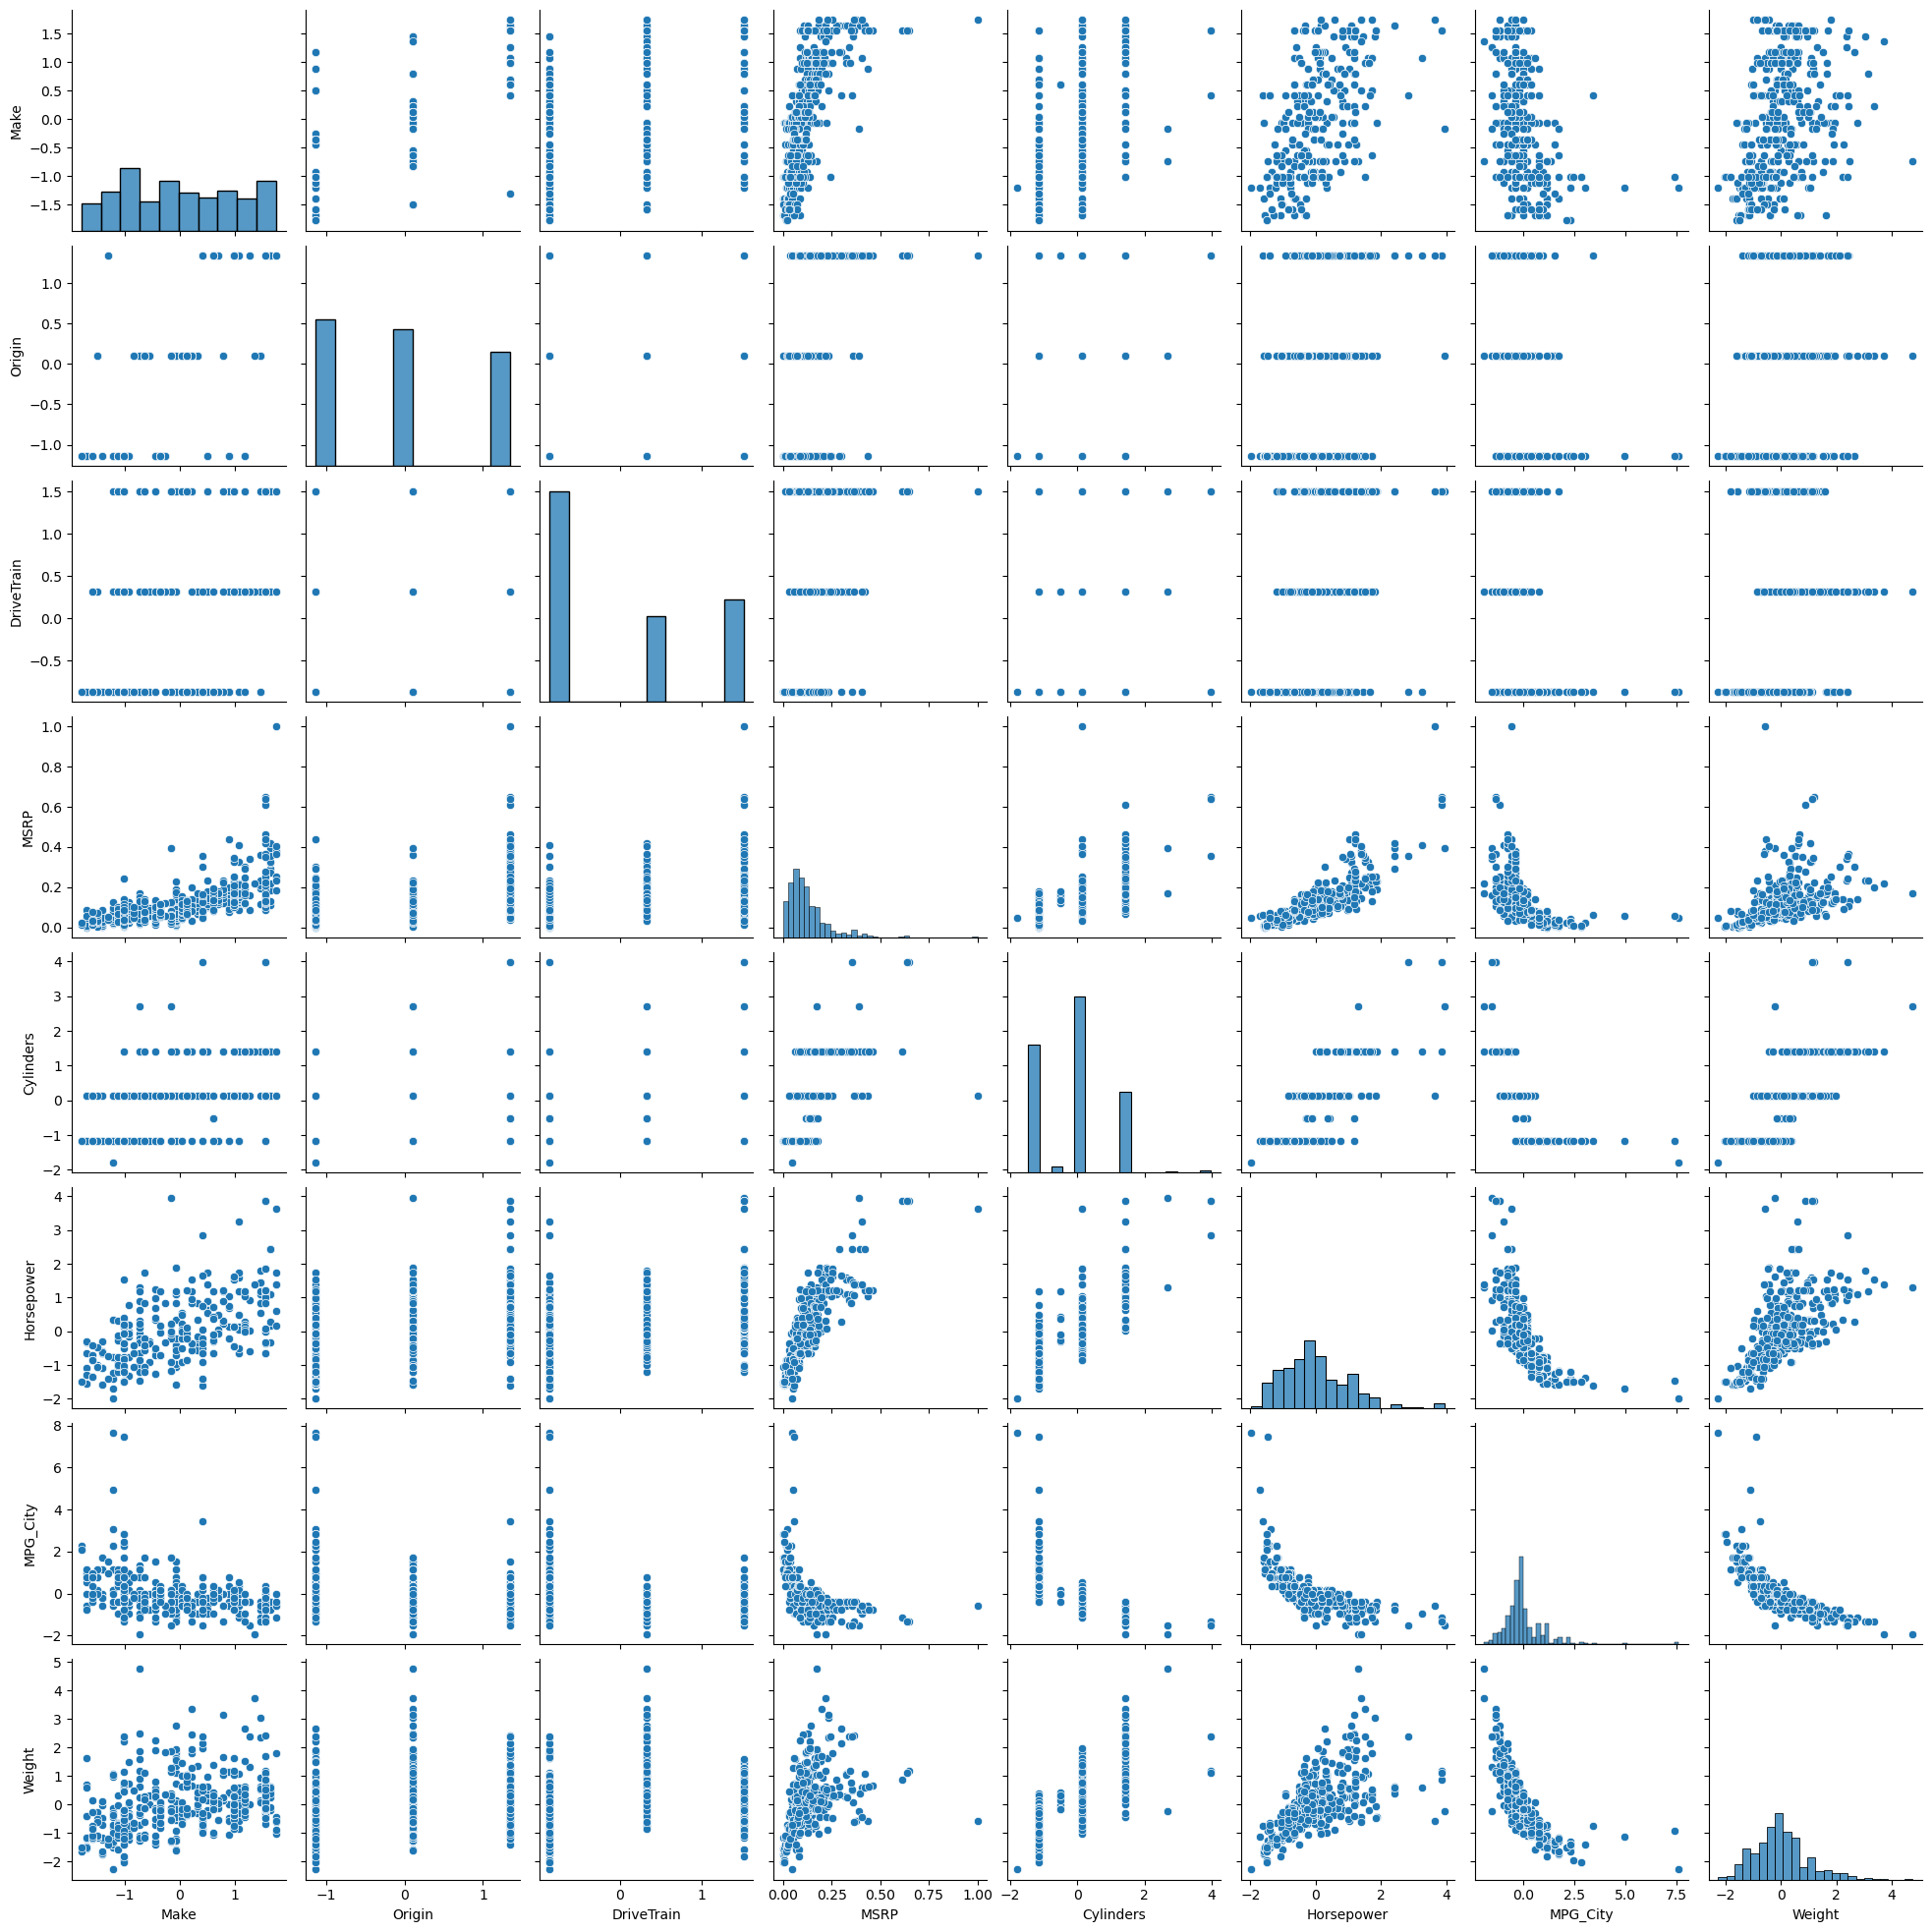

In [28]:
# [14]
# Data Scaling, Outliers and Patterns
sns.pairplot(clean_df)

In [29]:
# best model
rand_state = avg_dict['seed_clean']['rfr']
X_train, X_test, y_train, y_test = train_test_split(clean_df.drop(columns='MSRP'), clean_df['MSRP'], shuffle=True, test_size=0.2, random_state=rand_state)
model_rfr = RandomForestRegressor(random_state = rand_state)
model_rfr.fit(X_train, y_train)
score = model_rfr.score(X_test, y_test)
score

0.929279975090538

In [ ]:
# Predicted vs. Actual Prices

In [ ]:
# [15]
predictions_normalized = model_rfr.predict(X_test)
scaler = MinMaxScaler()
scaler.fit_transform(car_df[['MSRP']])
initial_scale_predictions = scaler.inverse_transform(predictions_normalized.reshape(-1, 1)).flatten()
initial_scale_y_test = scaler.inverse_transform(pd.DataFrame(y_test)[['MSRP']]).flatten()
results = pd.DataFrame({'Predictions': map(lambda x: round(x,2), initial_scale_predictions), 'Actual Price': initial_scale_y_test})
results.T

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
Predictions,18689.17,32460.29,19326.8,35151.01,15205.42,69939.8,24074.89,23968.95,19597.74,29245.58,...,26388.3,42721.47,29223.6,66528.7,29261.72,70833.7,12794.8,19122.52,54880.55,21858.37
Actual Price,18435.00,37630.00,20220.0,35145.00,13839.00,69195.0,28790.00,30950.00,19635.00,24780.00,...,22350.0,50470.00,20215.0,56665.0,32280.00,84165.0,11155.0,18715.00,48040.00,23495.00


In [ ]:
# Model Prediction Analysis

In [ ]:
# [16]
prediction_analysis_df =  pd.DataFrame(X_test).reset_index().drop('index',axis=1)
prediction_analysis_df['Error'] = (results['Predictions'] - results['Actual Price']).abs()
bins = pd.cut(prediction_analysis_df['Error'], bins=13)
grouped_pa_df = prediction_analysis_df.copy().groupby(bins).describe().map(lambda x: round(x, 3))
number_sample = prediction_analysis_df.shape[0]
pa_df = pd.DataFrame(grouped_pa_df[('Error', 'count')].map(lambda x: round(x / number_sample * 100, 2)))
pa_df['Cumulative Sum Percentage'] = pa_df[('Error', 'count')].cumsum()
pa_df

In [ ]:
# [17]
sns.pairplot(prediction_analysis_df)